In [44]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

plt.rc('font',family='Times New Roman')


In [2]:
A = pd.read_csv('../peryton/sign_final_ass.csv', index_col=0)
m, d = A.shape
latent = np.load('./latent_peryton_sign2_dot_conv_leakyrelu_base_noeye.npy')
latent_m, latent_d = latent[:A.shape[0],:], latent[A.shape[0]:,:]
sim_d_sign = np.load('../peryton/sim_d_sign.npy', allow_pickle=True)
sim_m_sign = np.load('../peryton/sim_m_sign.npy', allow_pickle=True)
dis_index = np.array(list(A.columns))
mic_index = np.array(list(A.index))
mic_i = {mic_index[i]: i for i in range(mic_index.shape[0])}
dis_i = {dis_index[i]: i for i in range(dis_index.shape[0])}

In [4]:
d_tsne = TSNE(n_components=2, random_state=42).fit_transform(latent_d)
# d_raw = TSNE(n_components=2, random_state=42).fit_transform(A.T)
d_raw = TSNE(n_components=2, random_state=42).fit_transform(sim_d_sign)

m_tsne = TSNE(n_components=2, random_state=42).fit_transform(latent_m)
# m_raw = TSNE(n_components=2, random_state=42).fit_transform(A)
m_raw = TSNE(n_components=2, random_state=42).fit_transform(sim_m_sign)

# m_pca = PCA(n_components=2).fit_transform(latent_m)
# m_pca_raw = PCA(n_components=2).fit_transform(sim_m_sign)

In [25]:
pred_alz_neg = pd.read_csv('./alz_neg_top10.csv', index_col=0).to_numpy()[:25,0]
pred_alz_pos = pd.read_csv('./alz_pos_top10.csv', index_col=0).to_numpy()[:25,0]
alz = A.iloc[:, 1].to_numpy()
microbe_label = np.zeros_like(alz, dtype=np.int32)
for i in range(microbe_label.shape[0]):
    if alz[i] == 1:
        microbe_label[i] = 1
    elif alz[i] == -1:
        microbe_label[i] = 2

pred_alz_neg_index = np.array(list(map(lambda x:mic_i[x], pred_alz_neg)))
pred_alz_pos_index = np.array(list(map(lambda x:mic_i[x], pred_alz_pos)))

microbe_label[pred_alz_pos_index] = 3
microbe_label[pred_alz_neg_index] = 4

label_list = ['Non_alz', 'Pos_alz', 'Neg_alz', 'Pos_pred_alz', 'Neg_pred_alz']

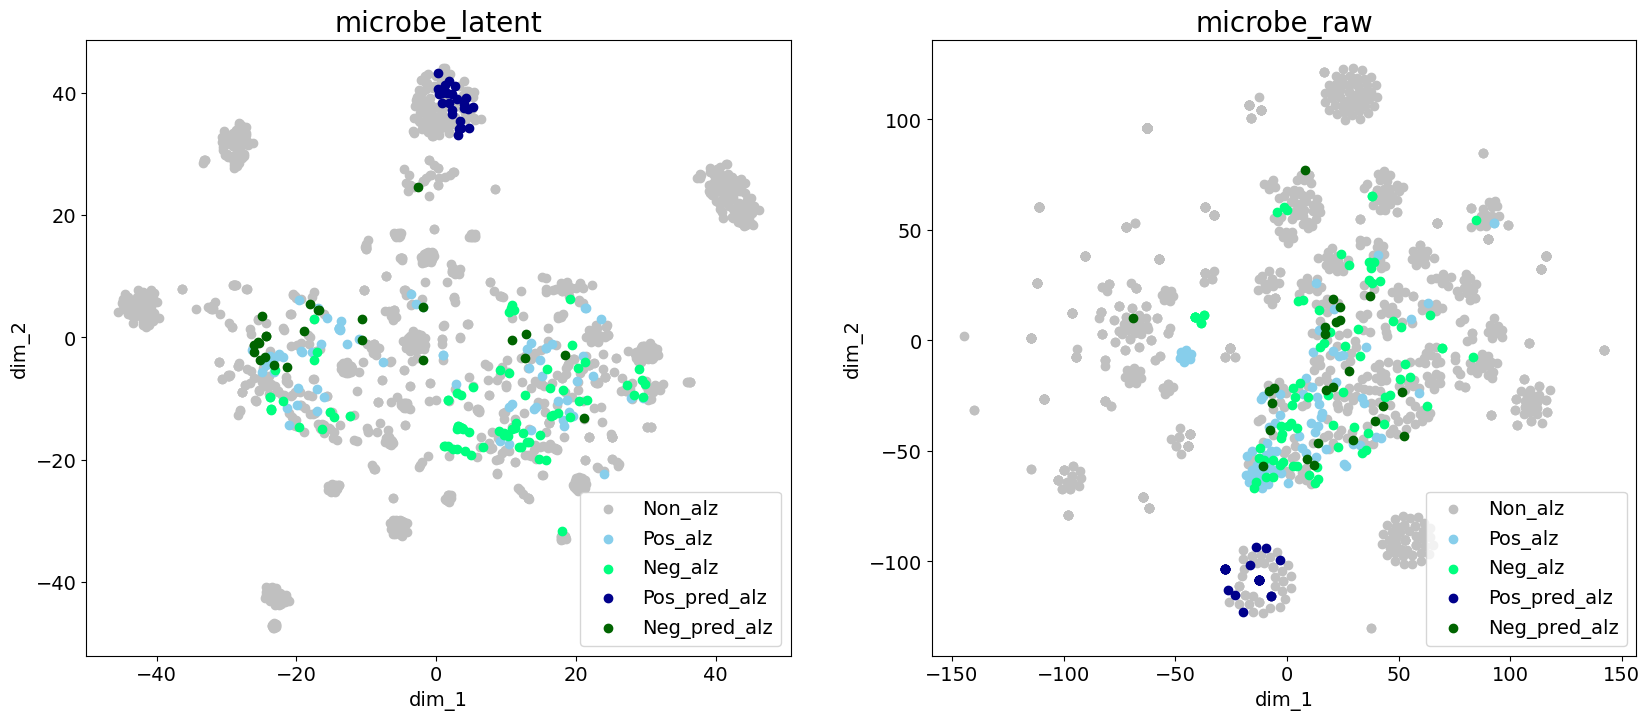

In [45]:
colors = ['silver', 'skyblue', 'springgreen', 'darkblue', 'darkgreen',  # 使用颜色编码定义颜色
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# colors = ['silver', 'darkgreen', 'darkblue', 'springgreen', 'skyblue',  # 使用颜色编码定义颜色
#           '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(20, 8))
plt.subplot(121)
for i in [0, 1, 2, 3, 4]:
    plt.scatter(m_tsne[microbe_label == i, 0], m_tsne[microbe_label == i, 1], label=label_list[i], c=colors[i])
plt.title('microbe_latent', fontsize=20)
plt.xlabel('dim_1',fontsize=14)
plt.ylabel('dim_2', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.subplot(122)
for i in [0, 1, 2, 3, 4]:
    plt.scatter(m_raw[microbe_label == i, 0], m_raw[microbe_label == i, 1], label=label_list[i], c=colors[i])
plt.title('microbe_raw',fontsize=20)
plt.xlabel('dim_1', fontsize=14)
plt.ylabel('dim_2', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="lower right", fontsize=14)